In [130]:
import random 
from math import sqrt, pi 
import matplotlib.pyplot as plt 
# Domyslnie ziarnem jest bodajze aktualny czas w OS
random.seed()

In [105]:
# ZAD 1 a)
# Mozna latwo sprawdzic, czy generator dziala:
import matplotlib.pyplot as plt
print([random.random() for _ in range(10**2)] == [random.random() for _ in range(10**2)])

False


In [106]:
# ZAD 1 b)
# Korzystam z faktu, ze w Pythonie pusta lista jest ewaluowana do False oraz z konstrukcji tzw. list comprehension
def choose_cards(cards_to_choose=3, interesting_cards=13, all_cards=52):
    deck = [x for x in range(1, all_cards+1)]
    cards_of_interest = random.sample(deck, interesting_cards)
    choosen_cards = random.sample(deck, cards_to_choose)
    return bool([i for i in choosen_cards if i in cards_of_interest])
    

In [107]:
def repeat_choice(how_many_times=10000):
    if how_many_times <= 0:
        return 0
    inside = 0
    for i in range(how_many_times):
        if choose_cards():
            inside += 1
    return 1-inside/how_many_times

In [108]:
# This cell might take 5-10 seconds to run

EXPECTED_PROBABILITY = 0.4135
NUMBER_OF_TRIALS = 100

spread_of_required_choices = []

for _ in range(NUMBER_OF_TRIALS):
    number_of_choices = 0
    current_probability = 0
    while abs(current_probability - EXPECTED_PROBABILITY) > 0.001:
        current_probability = repeat_choice(how_many_times=number_of_choices)
        number_of_choices += 1
    spread_of_required_choices.append(number_of_choices)
    
print(f'It takes between {min(spread_of_required_choices)} and {max(spread_of_required_choices)} trials to reach the exact (error < 0.1%) calculated value')

It takes between 30 and 207 trials to reach the exact (error < 0.1%) calculated value


In [109]:
# ZAD 2 - Wizualizacja w osobnym pliku pythona

In [120]:
def approximate_pi(num_of_points):
    if num_of_points <= 0:
        return -1
    inside = 0 
    for _ in range(num_of_points):
        x = random.random()
        y = random.random()
        if sqrt(x**2 + y**2) < 1.0:
            inside+=1
    return 4*inside/num_of_points

In [147]:
# This cell might take up to 5 seconds to run
num_of_arguments = (10**1, 5**2, 10**2, 5**3, 10**3, 5**4, 10**4, 5**5, 10**5, 5**6, 10**6, 5**7,10**7)
pi_approxims = [approximate_pi(argument) for argument in num_of_arguments]
error_of_approxims = [pi - x for x in pi_approxims]

for approx, argument in zip(pi_approxims, num_of_arguments):
    print(f'With {argument} points generated, the approximation is {approx}')

With 10 points generated, the approximation is 3.2
With 25 points generated, the approximation is 3.04
With 100 points generated, the approximation is 3.2
With 125 points generated, the approximation is 3.04
With 1000 points generated, the approximation is 3.16
With 625 points generated, the approximation is 3.0848
With 10000 points generated, the approximation is 3.1656
With 3125 points generated, the approximation is 3.12192
With 100000 points generated, the approximation is 3.14752
With 15625 points generated, the approximation is 3.133696
With 1000000 points generated, the approximation is 3.139788
With 78125 points generated, the approximation is 3.1506432
With 10000000 points generated, the approximation is 3.1412956


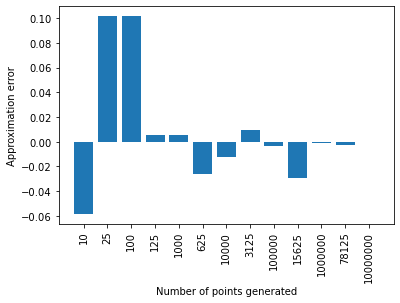

In [143]:
# Visualising the approximation error
plt.ylabel("Approximation error")
plt.xlabel("Number of points generated")
plt.xticks(rotation=90)
plt.bar(range(1, 14), error_of_approxims, tick_label=[str(x) for x in num_of_arguments]);